[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/NumEconNotebooks/master?urlpath=lab/tree/micro/06_Profit_maximization.ipynb)

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib import cm
import ipywidgets as widgets

import numecon.micro.profitmax_example as profitmax_example

# Profit maximization in 1D

We consider a firm with the production function:

$$
f(l) = \frac{\alpha}{1+\exp{(-(l-\beta))}} - \frac{\alpha}{1+\exp{(\beta))}}
$$

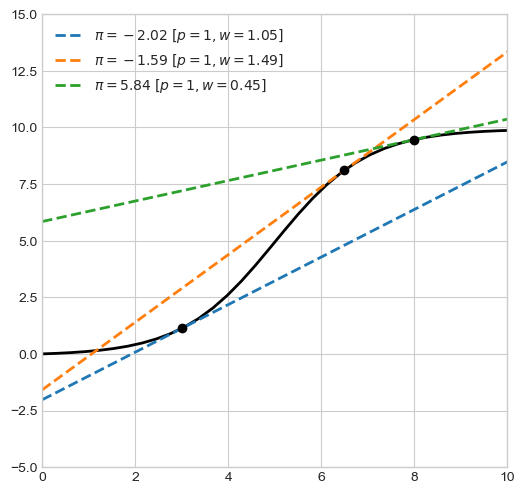

In [2]:
# a. settings
def f(l,alpha,beta):
    return alpha/(1+np.exp(-(l-beta))) - alpha/(1+np.exp(beta))

def f_prime(l,alpha,beta):
    return alpha*np.exp(beta-l)/(np.exp(beta-l)+1)**2
    
alpha = 10
beta = 5
p = 1

# b. figure
fig = plt.figure(frameon=False, figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)

l = np.linspace(0,15)
y = f(l,alpha,beta)
ax.plot(l,y,'black',lw='2')

for x in [3,6.5,8]:
    
    w = f_prime(x,alpha,beta)
    profit = p*f(x,alpha,beta) - w*x
    
    line = f(x,alpha,beta) + f_prime(x,alpha,beta)*(l-x)
    ax.plot(l,line,lw=2,ls='--',label=f'$\\pi = {profit:.2f}$ $[p=1,w={w:.2f}]$')
    ax.plot(x,f(x,alpha,beta),'ro',color='black')
              
ax.set_xlim([0,alpha])
ax.set_ylim([-5,alpha+5])

legend = ax.legend(loc='upper left')

# Production function in 2D and cost curves

We consider a firm with the production function:

$$ 
f(l,k)=\frac{\alpha}{1+e^{-(l-\beta)}+e^{-(k-\gamma)}}, f\in[\frac{\alpha}{1+e^{\beta}+e^{\gamma}},\alpha]
$$

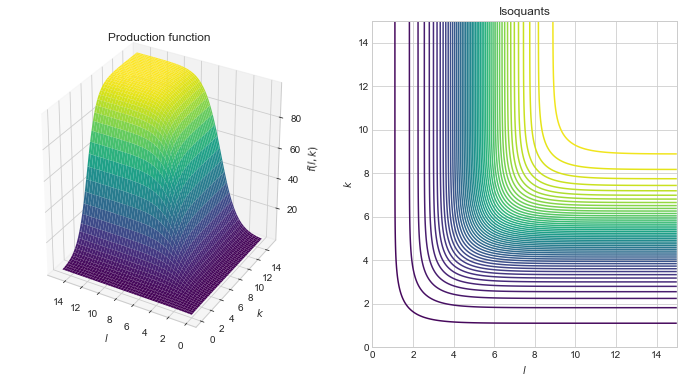

In [3]:
from types import SimpleNamespace
par = SimpleNamespace()
par.alpha = 100
par.beta = 5
par.gamma = 5

l_vec = np.linspace(0,15,200)
k_vec = np.linspace(0,15,200)
ff = np.empty((l_vec.size,k_vec.size))

for i1,l in enumerate(l_vec):
    for i2,k in enumerate(k_vec):
        ff[i1,i2] = profitmax_example.f(l,k,par)

# figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1,projection='3d')

l,k = np.meshgrid(l_vec,k_vec,indexing='ij')
ax.plot_surface(l,k,ff,cmap=cm.viridis,edgecolor='')

ax.set_xlabel('$l$')
ax.set_ylabel('$k$')
ax.set_zlabel('$f(l,k)$')
ax.invert_xaxis()
ax.set_title('Production function')

ax = fig.add_subplot(1,2,2)

l,k = np.meshgrid(l_vec,k_vec,indexing='ij')
ax.contour(l,k,ff,50,cmap=cm.viridis)

ax.set_xlabel('$l$')
ax.set_ylabel('$k$')
ax.set_title('Isoquants');

## Total costs

$$ 
C(x,w,r)=w\left(\beta-\log\left(\frac{w(\alpha-x)}{x(w+r)}\right)\right)+r\left(\gamma-\log\left(\frac{r(\alpha-x)}{x(w+r)}\right)\right) 
$$

$$ 
C^{SR}(x,w,\overline{k})=w\beta-\omega\log\left(\frac{\alpha-\left[1+e^{-(\overline{k}-\gamma)}\right]x}{x}\right) 
$$

$$ 
TE^{SR}(x,r,\overline{k})=C^{SR}(x,w,\overline{k})+r\overline{k} 
$$

In [4]:
profitmax_example.cost_figure()

interactive(children=(FloatSlider(value=8.0, description='$\\bar{k}$', max=20.0, min=1.0), Output()), _dom_cla…

## Average costs

In [5]:
profitmax_example.avg_cost_figure()

interactive(children=(FloatSlider(value=8.0, description='$\\bar{k}$', max=20.0, min=1.0), Output()), _dom_cla…

## Marginal costs

$$
MC^{LR}(x,w,r)=\frac{\alpha(w+r)}{x(\alpha-x)}
$$

$$
MC^{SR}(x,w,r)=\frac{w\alpha}{x(\alpha-[1+e^{-(\overline{k}-\gamma)}]x)}
$$

In [6]:
profitmax_example.MC_figure()

interactive(children=(FloatSlider(value=8.0, description='$\\bar{k}$', max=20.0, min=1.0), Output()), _dom_cla…

## Supply

In [7]:
profitmax_example.supply_figure()

interactive(children=(FloatSlider(value=5.0, description='$p$', max=20.0), FloatSlider(value=20.0, description…

# Cobb-Douglas supply function

In [8]:
def x_SR_func(p,w,kbar):
    A = 8
    a = 1/2
    b = 1/4
    return (A**(1/a)*kbar**(b/a)*a*p/w)**(a/(1-a))

def x_LR_func(p,w,r):
    
    return 256*p**3/(w**2*r)

def _cobb_douglas_output_figure(kbar):

    # settings
    wbase = 1
    rbase = 1
    p_low = 1
    p_high = 1.1

    xmax = 2*256
    pmax = 2
    p = np.linspace(0.1,pmax,100)

    # figure
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1) 

    x_SR = x_SR_func(p,wbase,kbar)
    ax.plot(x_SR,p,ls='-',color=colors[1],lw=2,label='short-run ($w=1$)')

    x_SR_low = x_SR_func(p_low,wbase,kbar)
    x_SR_high = x_SR_func(p_high,wbase,kbar)
    ax.plot([0,x_SR_low],[p_low,p_low],ls='--',Color='black')
    ax.plot([0,x_SR_high],[p_high,p_high],ls='--',Color='black')
    ax.plot([x_SR_low,x_SR_low],[0,p_low],ls='--',Color=colors[1])
    ax.plot([x_SR_high,x_SR_high],[0,p_high],ls='--',Color=colors[1])

    x_LR = x_LR_func(p,wbase,rbase)
    ax.plot(x_LR,p,ls='-',color=colors[0],lw=2,label='long-run ($w=r=1$)')  

    x_LR_low = x_LR_func(p_low,wbase,rbase)
    x_LR_high = x_LR_func(p_high,wbase,rbase)
    ax.plot([0,x_LR_low],[p_low,p_low],ls='--',Color='black')
    ax.plot([0,x_LR_high],[p_high,p_high],ls='--',Color='black')
    ax.plot([x_LR_low,x_LR_low],[0,p_low],ls='--',Color=colors[0])
    ax.plot([x_LR_high,x_LR_high],[0,p_high],ls='--',Color=colors[0])

   # text
    line = f''
    line += f'short-run: {np.round(x_SR_high-x_SR_low,2)}\n'
    line += f'long-run: {np.round(x_LR_high-x_LR_low,2)}\n'
    #ax.text(0.05,8,line,fontsize=12)

    # layout
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.grid(ls='--',lw=1)
    ax.set_xlim([0,xmax])
    ax.set_ylim([0,pmax])
    legend = ax.legend(loc='upper left', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

def cobb_douglas_output_figure():

    widgets.interact(_cobb_douglas_output_figure,
        kbar=widgets.FloatSlider(description='$\\bar{k}$',min=8, max=256, step=8, value=64),
    )
    
cobb_douglas_output_figure()

interactive(children=(FloatSlider(value=64.0, description='$\\bar{k}$', max=256.0, min=8.0, step=8.0), Output(…